In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import os

In [2]:
# target data
matchStats_file_path = os.getcwd()[:-4] + '\\csvData\\stats\\matchStats.csv'
matchStats_data = pd.read_csv(matchStats_file_path)
matchStats_data

,match_id,team_id,fouls,injuries,corners,offsides,shots_total,shots_on_target,shots_off_target,shots_blocked,...,substitutions,goal_kick,goal_attempts,free_kick,throw_in,ball_safe,goals,penalties,attacks,dangerous_attacks
0,25230,1035,10.0,1.0,7,2,11,3.0,3.0,5.0,...,3,6,6,10,25,0,2,0/1,0,0
1,25230,1052,9.0,0.0,5,1,9,4.0,2.0,3.0,...,3,7,6,12,20,0,3,0/0,0,0
2,25231,1047,20.0,0.0,5,1,8,3.0,2.0,3.0,...,2,16,5,7,24,0,1,0/0,0,0
3,25231,1040,7.0,1.0,7,0,18,3.0,8.0,7.0,...,1,4,11,21,30,0,1,0/0,0,0
4,25232,1038,8.0,2.0,7,2,22,11.0,8.0,3.0,...,3,15,19,8,17,0,4,0/0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,30198,2214,15.0,2.0,3,1,6,4.0,2.0,0.0,...,3,12,6,14,18,0,1,0/0,0,0
12220,30199,2222,19.0,3.0,6,1,22,7.0,12.0,3.0,...,3,8,19,24,16,0,1,0/0,0,0
12221,30199,2213,24.0,0.0,4,0,14,6.0,7.0,1.0,...,2,13,13,20,15,0,2,0/0,0,0
12222,30200,870,15.0,4.0,7,0,19,6.0,8.0,5.0,...,3,3,14,16,18,0,1,1/1,0,0


In [3]:
# matchStats_data = pd.read_csv(matchStats_file_path, header = None)
# matchStats_data = matchStats_data.iloc[1:]
# matchStats_data = matchStats_data.drop([0, 1], axis=1)
# matchStats_data.head()

In [4]:
df = pd.read_csv(matchStats_file_path)
# matchStats_data = matchStats_data.iloc[1:]
df = df.drop(['match_id', 'team_id'], axis=1)
# df.dropna()
df

,fouls,injuries,corners,offsides,shots_total,shots_on_target,shots_off_target,shots_blocked,possessionpercent,yellowcards,...,substitutions,goal_kick,goal_attempts,free_kick,throw_in,ball_safe,goals,penalties,attacks,dangerous_attacks
0,10.0,1.0,7,2,11,3.0,3.0,5.0,52,1,...,3,6,6,10,25,0,2,0/1,0,0
1,9.0,0.0,5,1,9,4.0,2.0,3.0,48,0,...,3,7,6,12,20,0,3,0/0,0,0
2,20.0,0.0,5,1,8,3.0,2.0,3.0,45,1,...,2,16,5,7,24,0,1,0/0,0,0
3,7.0,1.0,7,0,18,3.0,8.0,7.0,55,1,...,1,4,11,21,30,0,1,0/0,0,0
4,8.0,2.0,7,2,22,11.0,8.0,3.0,51,1,...,3,15,19,8,17,0,4,0/0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,15.0,2.0,3,1,6,4.0,2.0,0.0,48,1,...,3,12,6,14,18,0,1,0/0,0,0
12220,19.0,3.0,6,1,22,7.0,12.0,3.0,49,1,...,3,8,19,24,16,0,1,0/0,0,0
12221,24.0,0.0,4,0,14,6.0,7.0,1.0,51,3,...,2,13,13,20,15,0,2,0/0,0,0
12222,15.0,4.0,7,0,19,6.0,8.0,5.0,55,2,...,3,3,14,16,18,0,1,1/1,0,0


In [5]:
# identifying missing data
df.dtypes

fouls                float64
injuries             float64
corners                int64
offsides               int64
shots_total            int64
shots_on_target      float64
shots_off_target     float64
shots_blocked        float64
possessionpercent      int64
yellowcards            int64
yellowredcards         int64
redcards               int64
substitutions          int64
goal_kick              int64
goal_attempts          int64
free_kick              int64
throw_in               int64
ball_safe              int64
goals                  int64
penalties             object
attacks                int64
dangerous_attacks      int64
dtype: object

In [6]:
df['penalties'].unique()

array(['0/1', '0/0', '2/2', '1/1', '0', '1', '2', '1/2', '3', '3/3',
       '0/2', '2/3'], dtype=object)

In [7]:
X = df.drop('goals', axis = 1).copy()
# X = X.drop(['fouls','injuries', 'shots_on_target', 'shots_off_target', 'shots_blocked', 'offsides'], axis = 1).copy()

# drop highly correlated feature
# X = X.drop(['goal_attempts', 'possessionpercent','fouls','attacks','free_kick', 'throw_in','dangerous_attacks', 'substitutions'], axis = 1).copy()

# drop colums which cotain null value 
X = X.drop(['fouls','injuries', 'shots_on_target', 'shots_off_target', 'shots_blocked'], axis = 1).copy()

# X = X.drop(['fouls','injuries', 'shots_on_target', 'shots_off_target', 'shots_blocked', 'offsides'], axis = 1).copy()
# X = df.filter(['corners', 'goal_attempts', 'penalties'], axis=1)
# X = df['corners', 'shots_total', 'shots_total', 'goal_attempts', 'penalties'].copy()
X

,corners,offsides,shots_total,possessionpercent,yellowcards,yellowredcards,redcards,substitutions,goal_kick,goal_attempts,free_kick,throw_in,ball_safe,penalties,attacks,dangerous_attacks
0,7,2,11,52,1,0,0,3,6,6,10,25,0,0/1,0,0
1,5,1,9,48,0,0,0,3,7,6,12,20,0,0/0,0,0
2,5,1,8,45,1,0,0,2,16,5,7,24,0,0/0,0,0
3,7,0,18,55,1,0,0,1,4,11,21,30,0,0/0,0,0
4,7,2,22,51,1,0,0,3,15,19,8,17,0,0/0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,3,1,6,48,1,0,0,3,12,6,14,18,0,0/0,0,0
12220,6,1,22,49,1,0,0,3,8,19,24,16,0,0/0,0,0
12221,4,0,14,51,3,1,0,2,13,13,20,15,0,0/0,0,0
12222,7,0,19,55,2,0,0,3,3,14,16,18,0,1/1,0,0


In [8]:
y = df['goals'].copy()
y

0        2
1        3
2        1
3        1
4        4
        ..
12219    1
12220    1
12221    2
12222    1
12223    1
Name: goals, Length: 12224, dtype: int64

In [9]:
X.dtypes

corners               int64
offsides              int64
shots_total           int64
possessionpercent     int64
yellowcards           int64
yellowredcards        int64
redcards              int64
substitutions         int64
goal_kick             int64
goal_attempts         int64
free_kick             int64
throw_in              int64
ball_safe             int64
penalties            object
attacks               int64
dangerous_attacks     int64
dtype: object

In [10]:
X_encoded = pd.get_dummies(X, columns=['penalties'])
# X_encoded = X
X_encoded

,corners,offsides,shots_total,possessionpercent,yellowcards,yellowredcards,redcards,substitutions,goal_kick,goal_attempts,...,penalties_0/1,penalties_0/2,penalties_1,penalties_1/1,penalties_1/2,penalties_2,penalties_2/2,penalties_2/3,penalties_3,penalties_3/3
0,7,2,11,52,1,0,0,3,6,6,...,1,0,0,0,0,0,0,0,0,0
1,5,1,9,48,0,0,0,3,7,6,...,0,0,0,0,0,0,0,0,0,0
2,5,1,8,45,1,0,0,2,16,5,...,0,0,0,0,0,0,0,0,0,0
3,7,0,18,55,1,0,0,1,4,11,...,0,0,0,0,0,0,0,0,0,0
4,7,2,22,51,1,0,0,3,15,19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,3,1,6,48,1,0,0,3,12,6,...,0,0,0,0,0,0,0,0,0,0
12220,6,1,22,49,1,0,0,3,8,19,...,0,0,0,0,0,0,0,0,0,0
12221,4,0,14,51,3,1,0,2,13,13,...,0,0,0,0,0,0,0,0,0,0
12222,7,0,19,55,2,0,0,3,3,14,...,0,0,0,1,0,0,0,0,0,0


In [11]:
y_more_than_one_goals = y > 1
y_less_than_one_goals = y <= 1

y[y_more_than_one_goals] = 1
y[y_less_than_one_goals] = 0

y

0        1
1        1
2        0
3        0
4        1
        ..
12219    0
12220    0
12221    1
12222    0
12223    0
Name: goals, Length: 12224, dtype: int64

In [12]:
y.unique()

array([1, 0], dtype=int64)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

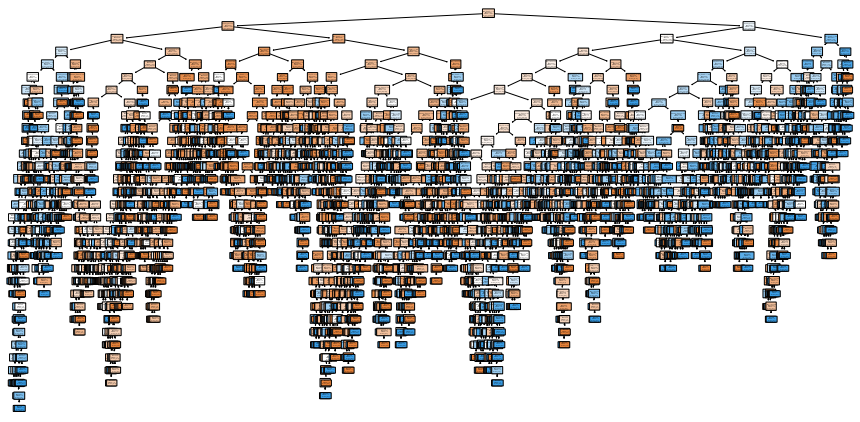

In [14]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt, filled = True, rounded = True, class_names = ['less than 1', 'more than 1'], feature_names = X_encoded.columns)
plt.show()

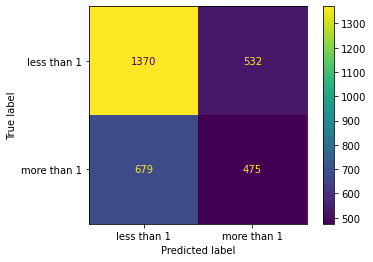

In [15]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ['less than 1', 'more than 1'])

## Solve the overfiting, and optimal accuracy
 Find out the best alpha for Decision Tree Classifier by cost complexity pruning

In [16]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.95676453e-08, 5.09161133e-08,
       2.25367409e-07, 2.99590869e-07, 3.54139752e-07, 4.27885101e-07,
       5.59359198e-07, 8.36892918e-07, 1.16735833e-06, 1.41655901e-06,
       1.98318261e-06, 2.01175610e-06, 2.41103103e-06, 2.64424348e-06,
       3.02986232e-06, 3.05105017e-06, 3.11642982e-06, 3.14639549e-06,
       4.40707247e-06, 4.94063586e-06, 6.27507006e-06, 7.27166958e-06,
       7.27166958e-06, 7.27166958e-06, 7.27166958e-06, 7.27166958e-06,
       7.79107455e-06, 8.68364197e-06, 9.69555943e-06, 9.87998584e-06,
       9.88296982e-06, 9.91591306e-06, 1.09075044e-05, 1.09075044e-05,
       1.21194493e-05, 1.21194493e-05, 1.45433392e-05, 1.45433392e-05,
       1.45433392e-05, 1.63343908e-05, 1.73134990e-05, 1.75880297e-05,
       1.81791739e-05, 1.81791739e-05, 1.91235466e-05, 2.04117041e-05,
       2.06947785e-05, 2.06998890e-05, 2.18150087e-05, 2.33732236e-05,
      

In [17]:
clf_dts = []

for ccp_alpha in ccp_alphas:
    if ccp_alpha < 0:
        ccp_alpha = 0
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

<function matplotlib.pyplot.show(*args, **kw)>

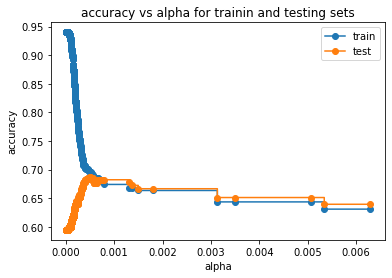

In [18]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for trainin and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = "steps-post")
ax.legend()
plt.show

# Evaluate a score by cross-validation

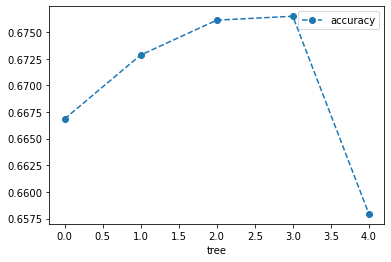

In [19]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.0005)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker = 'o', linestyle='--')

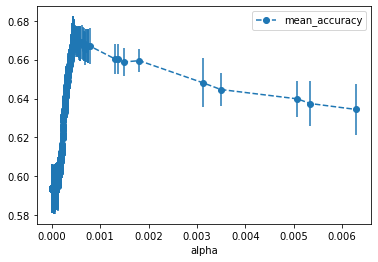

In [20]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    if ccp_alpha < 0:
        ccp_alpha = 0
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')


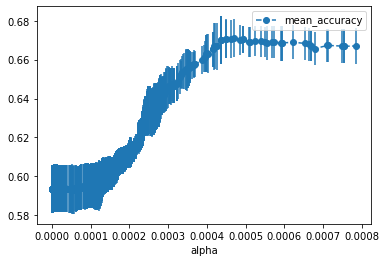

In [21]:
alpha_results = alpha_results[(alpha_results['alpha'] < 0.001)]

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

In [29]:
alpha_results[(alpha_results['alpha'] > 0.00042)
              &
              (alpha_results['alpha'] < 0.00052)]

,alpha,mean_accuracy,std
884,0.000421,0.666993,0.011876
885,0.000426,0.666775,0.012055
886,0.000435,0.670047,0.012245
887,0.000435,0.670047,0.012245
888,0.000435,0.670047,0.012245
889,0.000449,0.670811,0.009986
890,0.000450,0.670702,0.009882
891,0.000461,0.670593,0.009855
892,0.000469,0.670920,0.009805
893,0.000486,0.669939,0.007686


In [23]:
ideal_ccp_alpha = alpha_results[((alpha_results['alpha'] > 0.000492) & (alpha_results['alpha'] < 0.000494))]['alpha']
ideal_ccp_alpha[894]

0.0004925630819380563

In [24]:
ideal_ccp_alpha = float(ideal_ccp_alpha[894])
ideal_ccp_alpha

0.0004925630819380563

In [25]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

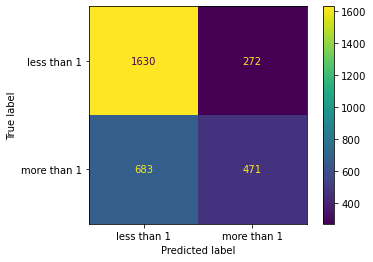

In [26]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels = ['less than 1', 'more than 1'])


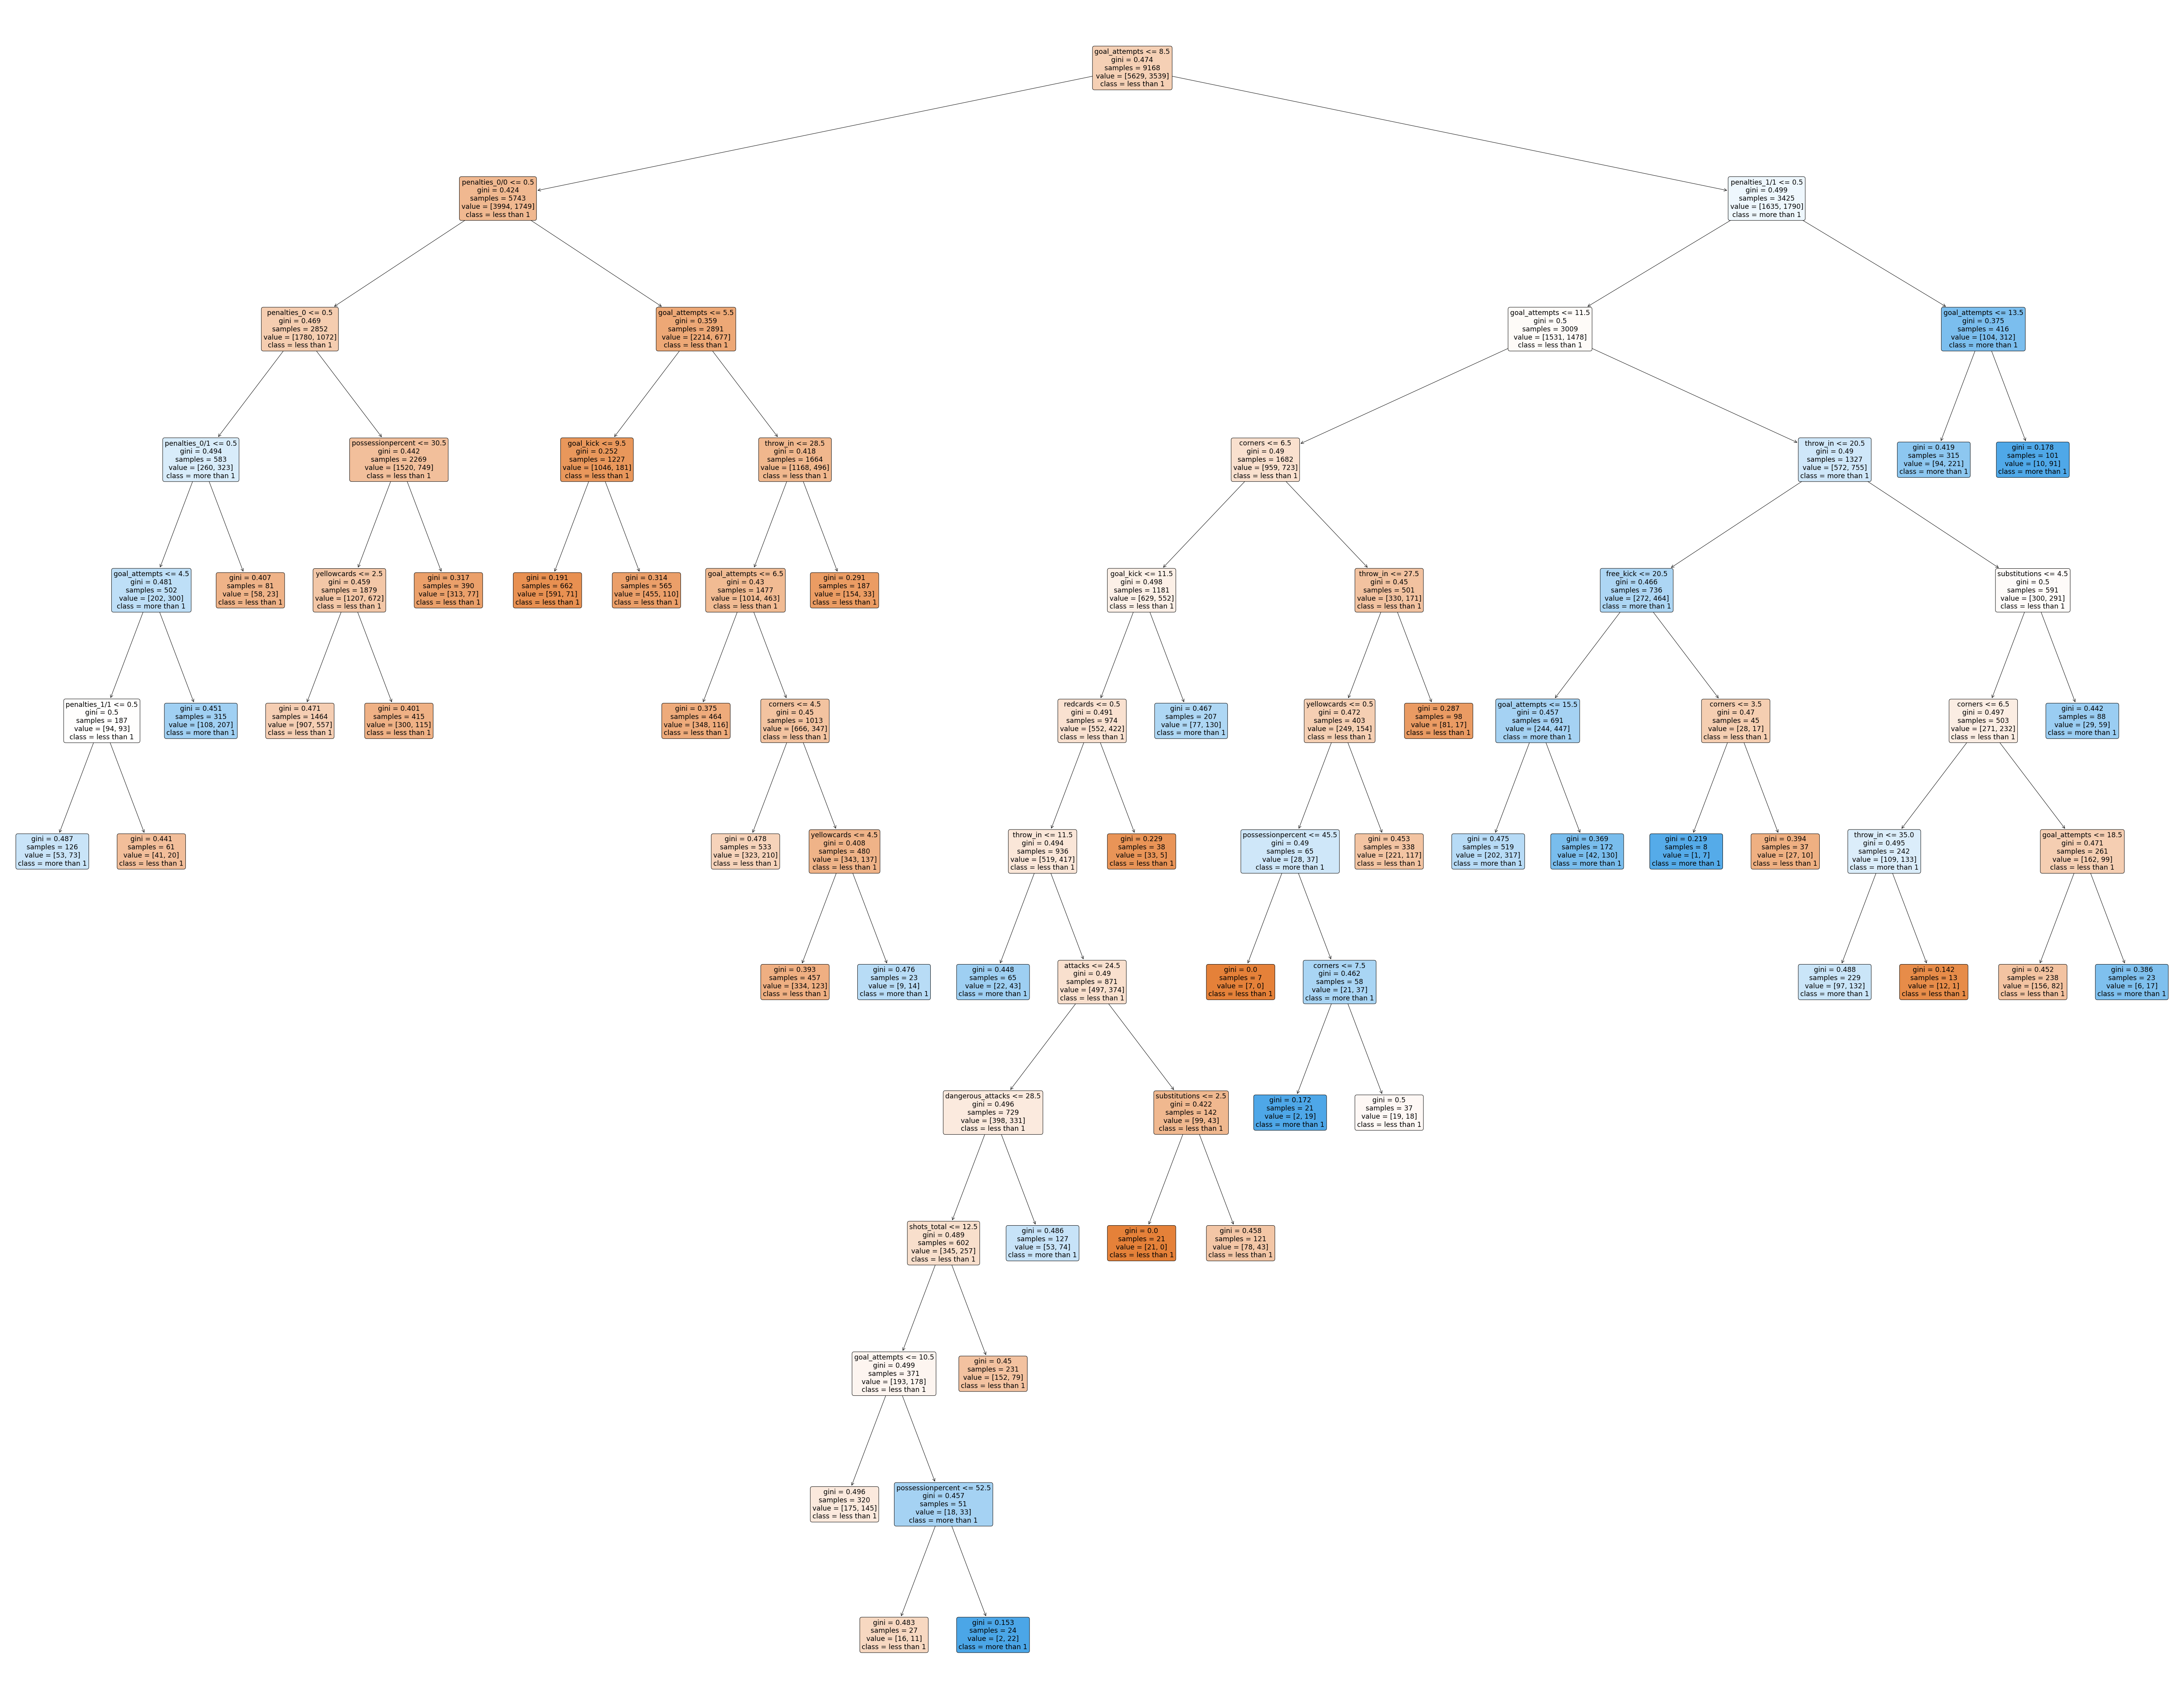

In [27]:
plt.figure(figsize = (100, 80))
plot_tree(clf_dt_pruned, filled = True, rounded = True, class_names = ['less than 1', 'more than 1'], feature_names = X_encoded.columns)
plt.savefig('out.pdf')